# Pymaceuticals Inc.
---

### Analysis

The analysis of tumor volume data reveals intriguing insights into the effectiveness of different treatments. A boxplot comparison of the four treatments - Capomulin, Ramicane, Infubinol, and Ceftamin - suggests that Capomulin and Ramicane are more effective in reducing final tumor volume. Notably, Infubinol is the only treatment with an outlier, indicating that it may not be as consistent in its effects.

A closer examination of the Capomulin regimen using a line plot reveals a fascinating pattern. Mouse r944, treated with Capomulin, exhibits an initial increase in tumor volume from 45 mm3 to 48 mm3 between 0 and 20 days of treatment. This could be indicative of an initial response to the drug, where the tumor grows before eventually shrinking. The tumor volume then decreases to its lowest point of 40 mm3 on the 35th day, suggesting that the drug may have reached its maximum efficacy. The slight increase in tumor volume to 41 mm3 by the 45th day could indicate a stabilization of the tumor. Overall, mouse l509 demonstrates a positive response to Capomulin treatment.

Furthermore, a correlation analysis reveals a strong direct relationship between mouse weight and average tumor volume, with a correlation coefficient of 0.84. A scatter plot of the entire Capomulin Regimen illustrates this relationship, showing that mice with higher weights tend to have higher average tumor volumes.

In [172]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "/Users/divya/Desktop/Module5/Pymaceuticals/data/Mouse_metadata.csv"
study_results_path = "/Users/divya/Desktop/Module5/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data = pd.merge(study_results, mouse_metadata, how='left', on='Mouse ID')

# Display the data table for preview
study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [173]:
# Checking the number of mice.
study_data["Mouse ID"].nunique()

249

In [174]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = study_data[study_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice["Mouse ID"].unique()

array(['g989'], dtype=object)

In [175]:
# Optional: Get all the data for the duplicate mouse ID.
all_duplicate = study_data.loc[study_data['Mouse ID'] == 'g989', :]
all_duplicate

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [176]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = study_data.drop(all_duplicate.index)
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [177]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [178]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()


248

## Summary Statistics

In [179]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_stats = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_stats = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
var_stats = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
std_stats = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
sem_stats = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

summary_stats = pd.DataFrame({'Mean Tumor Volume':mean_stats, 'Median Tumor Volume':median_stats, 'Tumor Volume Variance':var_stats, 'Tumor Volume Std. Dev.':std_stats, 'Tumor Volume Std. Err.':sem_stats})
summary_stats

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [180]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std"])
summary_stats["SEM"] = summary_stats["std"] / (summary_stats.index.map(clean_df["Drug Regimen"].value_counts()) ** 0.5)
summary_stats

# Using the aggregation method, produce the same summary statistics in a single line


,mean,median,var,std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

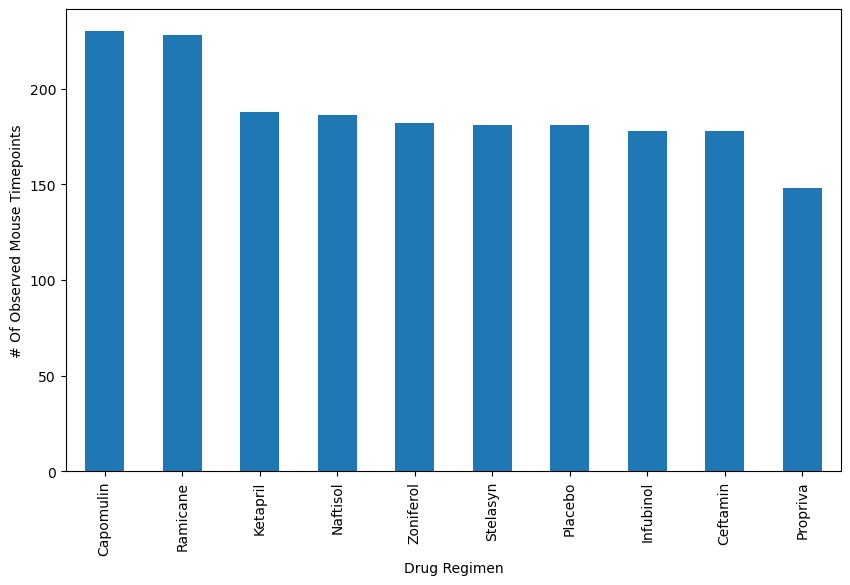

In [181]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
plt.figure(figsize=(10, 6))
clean_df["Drug Regimen"].value_counts().plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# Of Observed Mouse Timepoints")
plt.show()

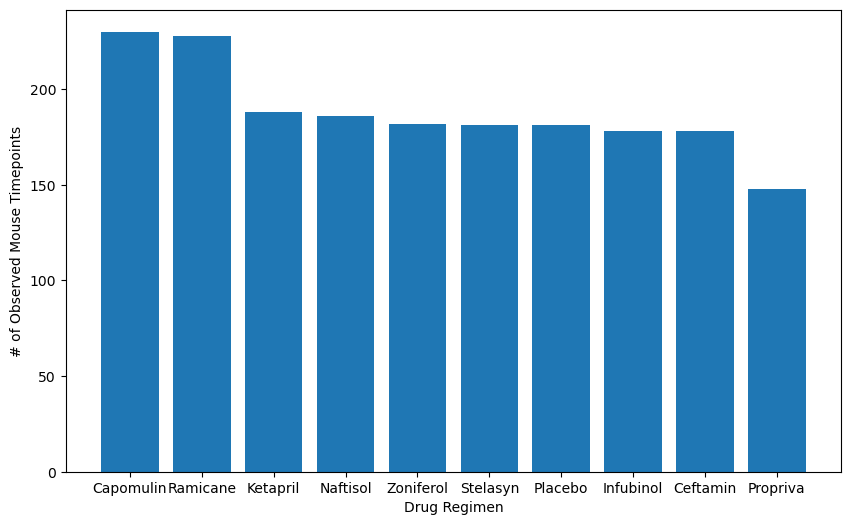

In [182]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10, 6))
regimens = clean_df["Drug Regimen"].value_counts().index
counts = clean_df["Drug Regimen"].value_counts().values
plt.bar(regimens, counts)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

<Axes: ylabel='count'>

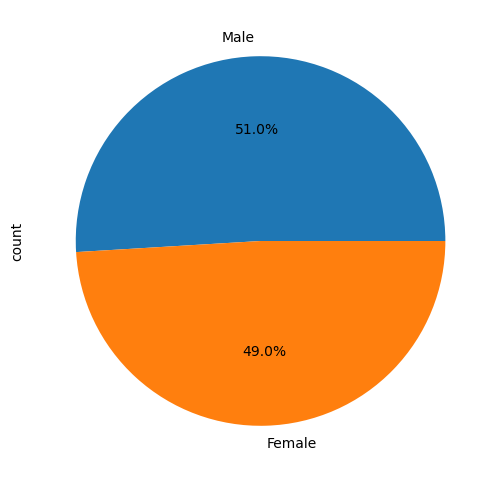

In [183]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts = clean_df["Sex"].value_counts()

# Make the pie chart
gender_counts.plot(kind="pie", figsize=(8, 6), autopct='%1.1f%%')

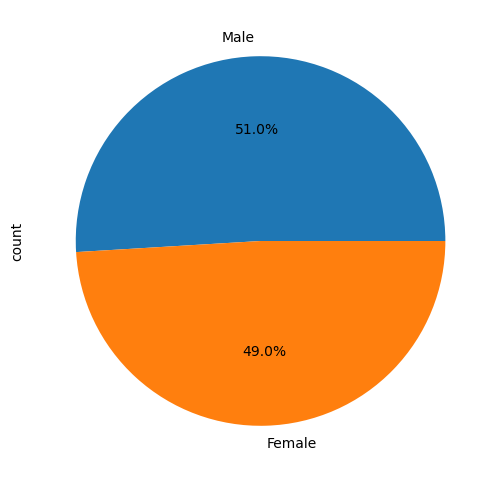

In [184]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts = clean_df["Sex"].value_counts()

# Make the pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels = gender_counts.index, autopct='%1.1f%%')
plt.ylabel('count')
plt.show()



## Quartiles, Outliers and Boxplots

In [185]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
cric_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
cric_drugs_df = clean_df[clean_df['Drug Regimen'].isin(cric_drugs)]

# Start by getting the last (greatest) timepoint for each mouse
final_timepoint = cric_drugs_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_cric = pd.merge(final_timepoint, clean_df, on=['Mouse ID', 'Timepoint'], how='left')
final_cric_df = final_cric[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Drug Regimen']]

final_cric_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a275,45,62.999356,Ceftamin
3,a411,45,38.407618,Ramicane
4,a444,45,43.047543,Ramicane
...,...,...,...,...
95,y769,45,68.594745,Ceftamin
96,y793,45,31.896238,Capomulin
97,y865,45,64.729837,Ceftamin
98,z578,45,30.638696,Ramicane


In [186]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = final_cric_df[final_cric_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    # add subset
    tumor_volumes.append(tumor_vol)

    # Determine outliers using upper and lower bounds
    Q1 = tumor_vol.quantile(0.25)
    Q3 = tumor_vol.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]

    print(f"{treatment}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


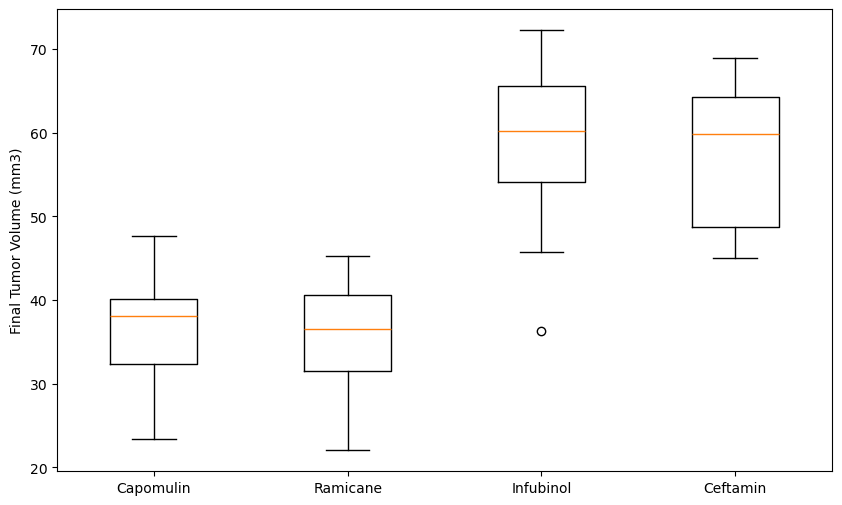

In [187]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volumes, labels=treatments)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

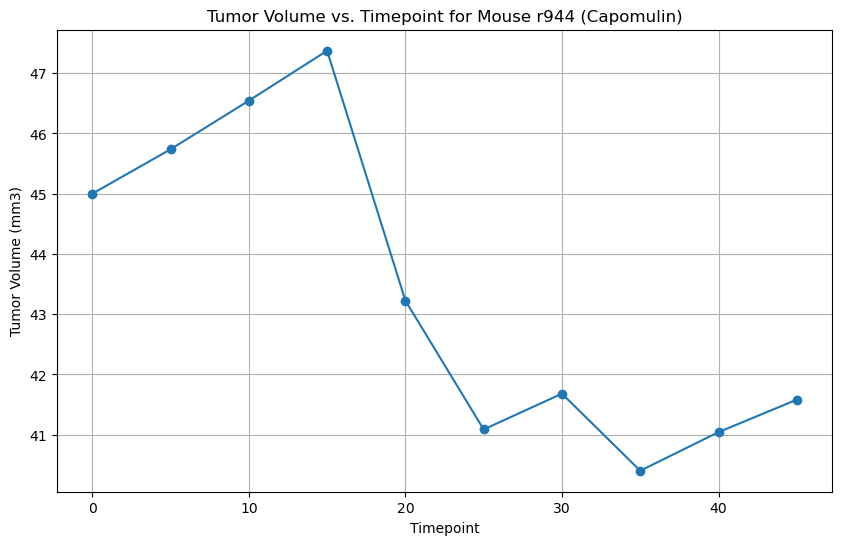

In [188]:
# Filter data for Capomulin and Mouse I509
capomulin_mouse = clean_df[(clean_df['Drug Regimen'] == 'Capomulin') & (clean_df['Mouse ID'] == 'r944')]

# Generate the line plot
plt.figure(figsize=(10,6))
plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'], marker='o')
plt.title('Tumor Volume vs. Timepoint for Mouse r944 (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

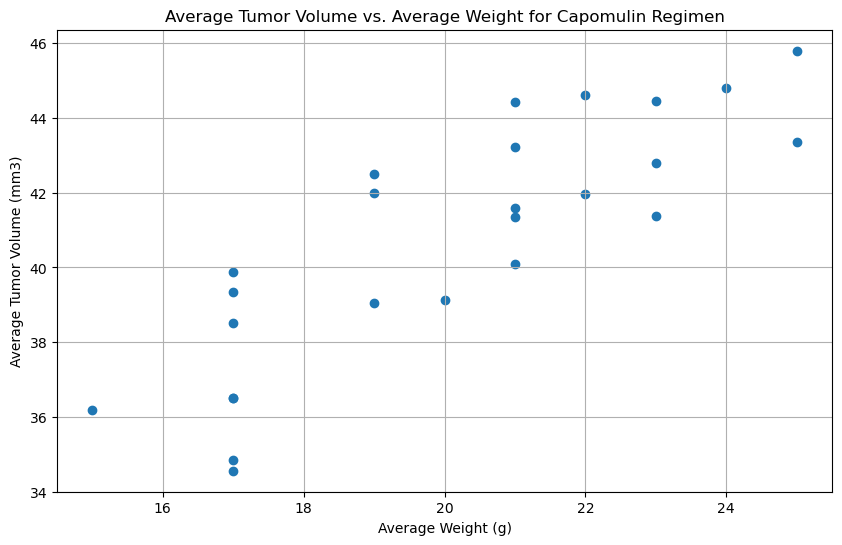

In [189]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = clean_df[clean_df['Drug Regimen'] == 'Capomulin']

# Group data by Mouse ID and calculate average tumor volume
avg_tumor_vol = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

# Group data by Mouse ID and calculate average weight
avg_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean().reset_index()

# Merge the two dataframes
merged_data = avg_tumor_vol.merge(avg_weight, on='Mouse ID')

# Generate the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])
plt.title('Average Tumor Volume vs. Average Weight for Capomulin Regimen')
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


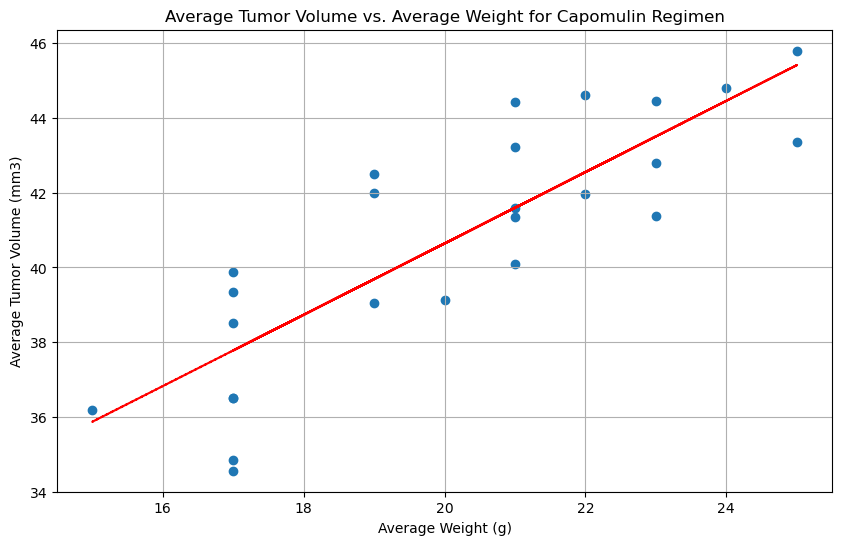

In [190]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculate the correlation coefficient
correlation_coefficient = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])

print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")

# Generate the scatter plot with a linear regression line
plt.figure(figsize=(10,6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Calculate the linear regression line
z = np.polyfit(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], 1)
p = np.poly1d(z)

plt.plot(merged_data['Weight (g)'],p(merged_data['Weight (g)']),"r--")

plt.title('Average Tumor Volume vs. Average Weight for Capomulin Regimen')
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()